<a href="https://colab.research.google.com/github/haaraamk/MLforAI/blob/main/week6_haramkang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4AI_Class

### 응용통계학과

### 20212049

### 강하람

# Goal for this practice session

## Learn pandas dataframe, aggregation methods

## Try running ch4 codes

# Tasks for today 1

* Open ch4, 1 querying_and_merging.ipynb

* Find all entries where datatype is “PRCP“ and station ID containing “S0007”

* Practice Filtering data-How many unique values in “attributes” variable?-What is the most frequent one?

In [1]:
# 데이터 불러오기

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/dirty_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_week_of_may_20_per_minute.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/melted_stock_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/nyc_weather_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/stocks.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_by_station.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_stations.csv

!mkdir data

!mv *.* data


import pandas as pd

weather = pd.read_csv('data/nyc_weather_2018.csv')
weather.head()

--2023-10-11 01:49:33--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/dirty_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46422 (45K) [text/plain]
Saving to: ‘dirty_data.csv’

dirty_data.csv      100%[===================>]  45.33K  --.-KB/s    in 0.01s   

2023-10-11 01:49:33 (3.13 MB/s) - ‘dirty_data.csv’ saved [46422/46422]

--2023-10-11 01:49:33--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [4]:
filtered_data_1 = weather.query('datatype == "PRCP" and station.str.contains("S0007")')
filtered_data_1.head()

# weather.query(...): 이 부분은 Pandas 데이터프레임에서 데이터를 쿼리하는 기능을 사용하는 부분입니다. 이 부분은 SQL 스타일의 쿼리를 지원합니다.

# 'datatype == "SNOW" and value > 0 and station.str.contains("US1NY")': 이 부분은 데이터를 필터링하는 조건을 지정합니다.

,date,datatype,station,attributes,value
79,2018-01-01T00:00:00,PRCP,GHCND:US1NYNS0007,",,N,",0.0
311,2018-01-02T00:00:00,PRCP,GHCND:US1NYNS0007,",,N,",0.0
545,2018-01-03T00:00:00,PRCP,GHCND:US1NYNS0007,",,N,",0.0
788,2018-01-04T00:00:00,PRCP,GHCND:US1NYNS0007,",,N,",4.1
1044,2018-01-05T00:00:00,PRCP,GHCND:US1NYNS0007,",,N,",18.0


In [5]:
weather[
    (weather.datatype == 'PRCP')
    & weather.station.str.contains('S0007')
].equals(filtered_data_1)

True

In [10]:
weather.attributes.describe()

count     78780
unique       26
top        ,,N,
freq      34153
Name: attributes, dtype: object

In [6]:
# 고유한 값의 수 찾기

unique_attributes = weather['attributes'].nunique()
print(f"Number of unique values in 'attributes': {unique_attributes}")

Number of unique values in 'attributes': 26


In [7]:
# 가장 빈번하게 나타나는 값 찾기

most_frequent_attribute = weather['attributes'].mode().iloc[0]
print(f"The most frequent 'attributes' value is: {most_frequent_attribute}")

The most frequent 'attributes' value is: ,,N,


# Tasks for today 2

* Open ch4, 3-aggregations.ipynb

* Practice ch4-2, 3 codes

* Find which quarter had the most rain from the daily precipitation data.

* Assign ‘quarterly total precipitation’ and ‘number of days in a month’ variables to daily precipitation data.

* Calculate rolling 3day mean precipitation

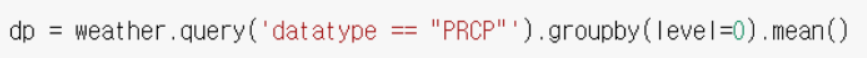

###  ch4, 3-aggregations.ipynb 중요

In [ ]:
# agg
# group by

In [35]:
dp = weather.query('datatype == "PRCP"').groupby(level = 0).mean()

<ipython-input-35-69bdcb0300e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dp = weather.query('datatype == "PRCP"').groupby(level = 0).mean()


In [36]:
# 날짜 열을 datetime 형식으로 변환
weather['date'] = pd.to_datetime(weather['date'])

# 날짜 열에서 분기(quarter) 정보 추출
weather['quarter'] = weather['date'].dt.to_period('Q')

In [38]:
weather['date'].dt.to_period('Q')

0        2018Q1
1        2018Q1
2        2018Q1
3        2018Q1
4        2018Q1
          ...  
78775    2018Q4
78776    2018Q4
78777    2018Q4
78778    2018Q4
78779    2018Q4
Name: date, Length: 78780, dtype: period[Q-DEC]

In [40]:
# 분기별로 데이터를 그룹화
quarterly_groups = weather.groupby('quarter')

# 각 분기별로 작업 수행 예제: 분기별 강수량 합계 계산
quarterly_precipitation = quarterly_groups['value'].sum()

# 각 분기별로 다른 작업 수행 가능
# 예를 들어, 각 분기별로 평균을 계산하려면 다음과 같이 사용
quarterly_mean = quarterly_groups['value'].mean()

# 다른 집계 함수 사용 가능
quarterly_max = quarterly_groups['value'].max()

# 분기별로 작업을 수행한 결과 출력
print(quarterly_precipitation)
print(quarterly_mean)
print(quarterly_max)

quarter
2018Q1    938387.2
2018Q2    860437.0
2018Q3    883155.2
2018Q4    859296.3
Freq: Q-DEC, Name: value, dtype: float64
quarter
2018Q1    46.128260
2018Q2    44.272550
2018Q3    46.156329
2018Q4    43.250267
Freq: Q-DEC, Name: value, dtype: float64
quarter
2018Q1    2355.0
2018Q2    2359.0
2018Q3    2357.0
2018Q4    2359.0
Freq: Q-DEC, Name: value, dtype: float64


# Tasks for today 3

* Practice crosstab and pivot_table.

* Use pivot_table to produce the same result as below

In [15]:
# fb data
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


In [18]:
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,1.714318e+02,1.751438e+02,1.681567e+02
high,1.734610e+02,1.794200e+02,1.704767e+02
low,1.693063e+02,1.721075e+02,1.615733e+02
open,1.713556e+02,1.758181e+02,1.677267e+02
volume,2.454721e+07,7.907256e+07,1.419240e+08


In [19]:
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.431771,173.461040,169.306252,171.355565,2.454721e+07
med,175.143750,179.420000,172.107500,175.818125,7.907256e+07
high,168.156667,170.476667,161.573333,167.726667,1.419240e+08


In [22]:
# crosstab
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'] # name the columns index
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


# Tasks for today 4

* Open ch4, 4-time_series.ipynb

* Practice the codes.